In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
# Edit this function to create your own pipeline.
def pipeline(img, s_thresh=(170, 255), sx_thresh=(20, 100)):
    img = np.copy(img)
    # Convert to HLS color space and separate the V channel
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    l_channel = hls[:,:,1]
    s_channel = hls[:,:,2]
    # Sobel x
    sobelx = cv2.Sobel(l_channel, cv2.CV_64F, 1, 0) # Take the derivative in x
    abs_sobelx = np.absolute(sobelx) # Absolute x derivative to accentuate lines away from horizontal
    scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))
    
    # Threshold x gradient
    sxbinary = np.zeros_like(scaled_sobel)
    sxbinary[(scaled_sobel >= sx_thresh[0]) & (scaled_sobel <= sx_thresh[1])] = 1
    
    # Threshold color channel
    s_binary = np.zeros_like(s_channel)
    s_binary[(s_channel >= s_thresh[0]) & (s_channel <= s_thresh[1])] = 1
    # Stack each channel
    color_binary = np.dstack(( np.zeros_like(sxbinary), sxbinary, s_binary)) * 255
    return color_binary

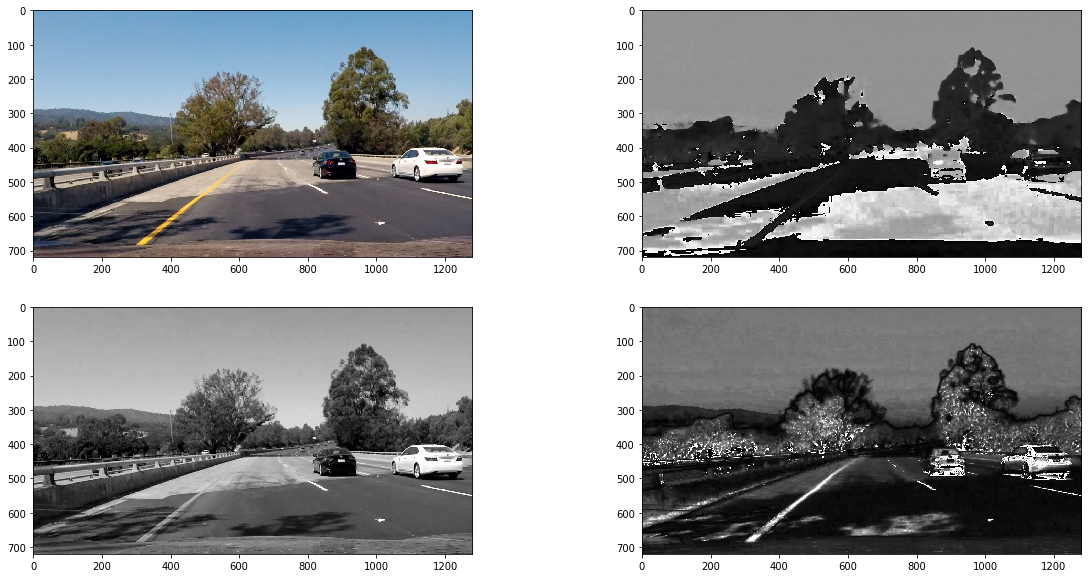

In [29]:
## img = np.copy(image)
# Convert to HLS color space and separate the V channel
img = mpimg.imread('test4.jpg')
hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
h_channel = hls[:,:,0]
l_channel = hls[:,:,1]
s_channel = hls[:,:,2]
f, axarr = plt.subplots(2, 2, figsize=(20,10))
axarr[0,0].imshow(img)
axarr[0,1].imshow(h_channel, cmap='gray')
axarr[1,0].imshow(l_channel, cmap='gray')
axarr[1,1].imshow(s_channel, cmap='gray')

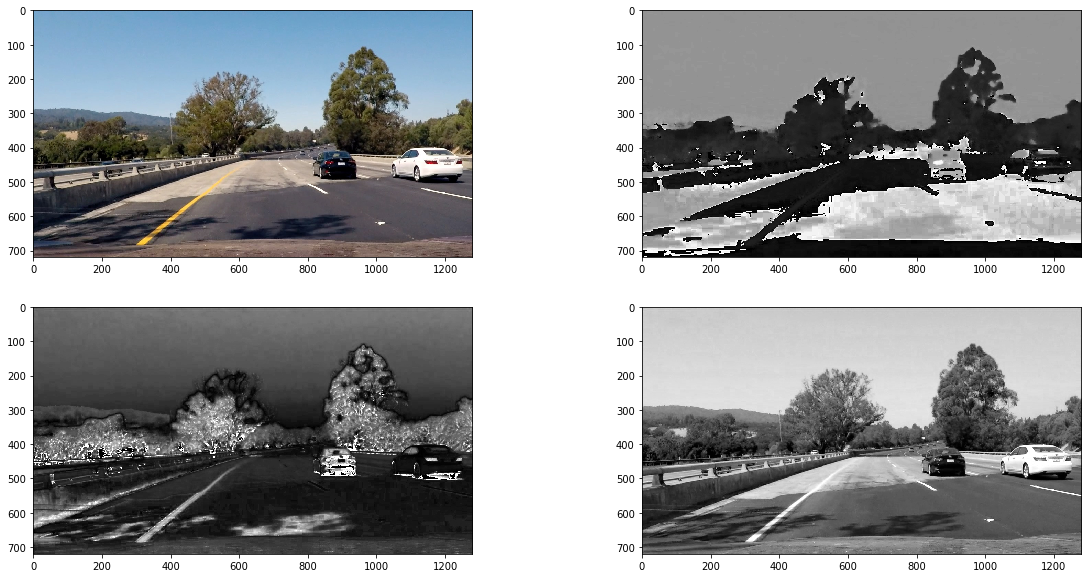

In [30]:
hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
h_hsvchannel = hsv[:,:,0]
s_hsvchannel = hsv[:,:,1]
v_hsvchannel = hsv[:,:,2]
f, axarr = plt.subplots(2, 2, figsize=(20,10))
axarr[0,0].imshow(img)
axarr[0,1].imshow(h_hsvchannel, cmap='gray')
axarr[1,0].imshow(s_hsvchannel, cmap='gray')
axarr[1,1].imshow(v_hsvchannel, cmap='gray')

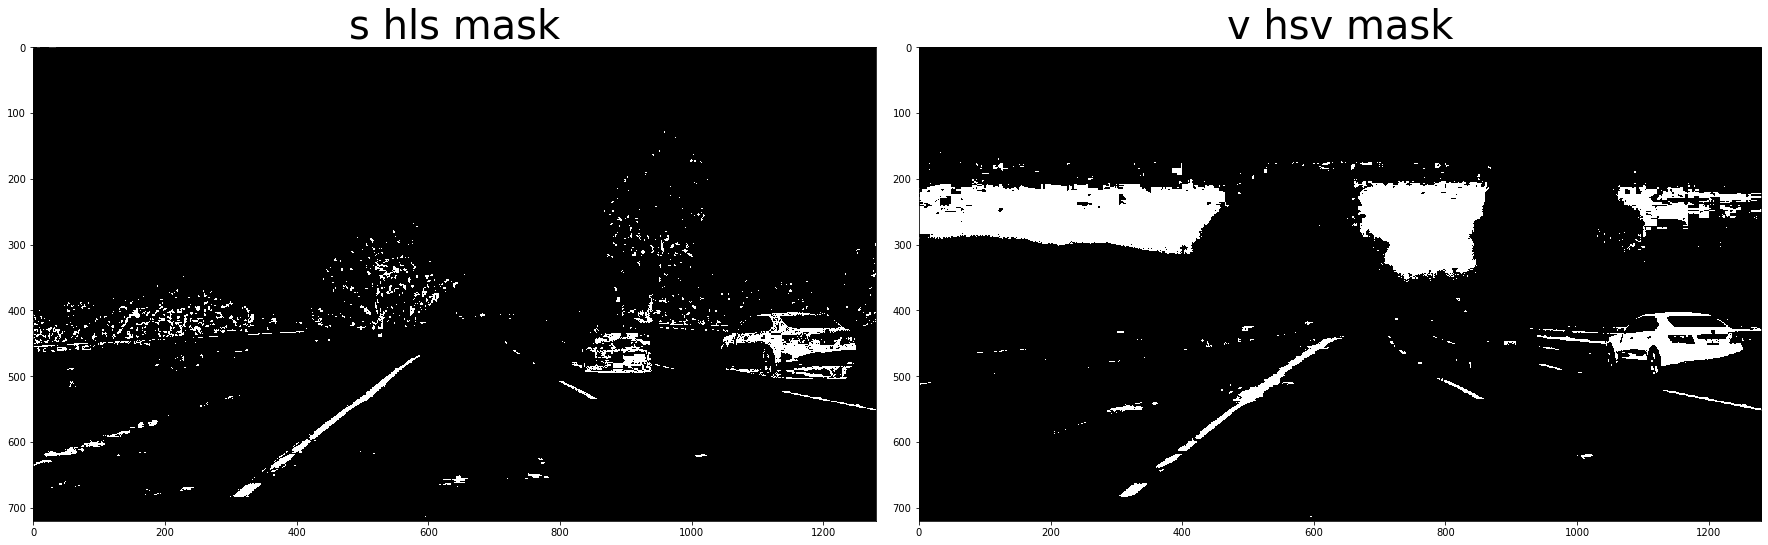

In [31]:
v_hsvthresh = (220, 255)
s_thresh=(170, 255)
#sx_thresh=(20, 100)
# Threshold color channel
v_hsvbinary = np.zeros_like(v_hsvchannel)
v_hsvbinary[(v_hsvchannel >= v_hsvthresh[0]) & (v_hsvchannel <= v_hsvthresh[1])] = 1
# Threshold color channel
s_binary = np.zeros_like(s_channel)
s_binary[(s_channel >= s_thresh[0]) & (s_channel <= s_thresh[1])] = 1
# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()

ax1.imshow(s_binary, cmap='gray')
ax1.set_title('s hls mask', fontsize=40)

ax2.imshow(v_hsvbinary, cmap='gray')
ax2.set_title('v hsv mask', fontsize=40)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

In [14]:
# Sobel x
sobelx = cv2.Sobel(l_channel, cv2.CV_64F, 1, 0) # Take the derivative in x
abs_sobelx = np.absolute(sobelx) # Absolute x derivative to accentuate lines away from horizontal
scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))

# Threshold x gradient
sxbinary = np.zeros_like(scaled_sobel)
sxbinary[(scaled_sobel >= sx_thresh[0]) & (scaled_sobel <= sx_thresh[1])] = 1

# Threshold color channel
s_binary = np.zeros_like(s_channel)
s_binary[(s_channel >= s_thresh[0]) & (s_channel <= s_thresh[1])] = 1

# Threshold color channel
v_hsvbinary = np.zeros_like(v_hsvchannel)
v_hsvbinary[(v_hsvchannel >= v_hsvthresh[0]) & (v_hsvchannel <= v_hsvthresh[1])] = 1
# Stack each channel
color_binary = np.dstack(( np.zeros_like(sxbinary), sxbinary, s_binary)) * 255

NameError: name 'sx_thresh' is not defined

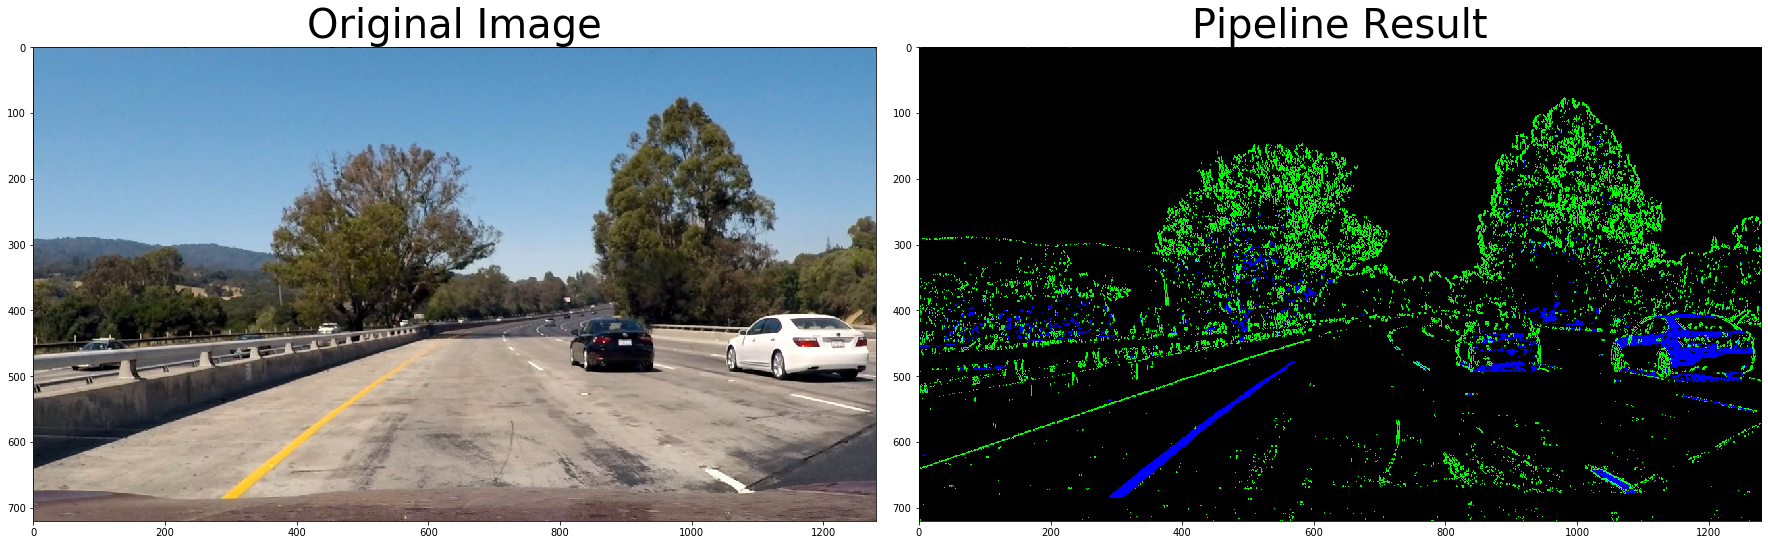

In [19]:
#image = mpimg.imread('bridge_shadow.jpg')
image = mpimg.imread('test1.jpg')

    
result = pipeline(image)

# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()

ax1.imshow(image)
ax1.set_title('Original Image', fontsize=40)

ax2.imshow(result)
ax2.set_title('Pipeline Result', fontsize=40)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)